In [ ]:
import sys 
sys.path.append('C:/directory/path/downloaded_py_files/')
import GPR_locate_rebars as gpr_lr

In [2]:
# Save DZT into CSV files
downloaded_path = "C:/directory/path/"
df1, df2 = gpr_lr.readdzt(downloaded_path + "Lab_specimen_data.DZT")
gpr_lr.save_to_csv(df1, downloaded_path, 'data')
gpr_lr.save_to_csv(df2, downloaded_path, 'config')

In [3]:
# Read saved CSV files
user_directory = "C:/directory/path/"
df_1, df_2 = gpr_lr.read_csv(user_directory)

In [4]:
# Allocate all the GPR configuration settings as variables in Python
result_variables = gpr_lr.config_to_variable(df_2)
locals().update(result_variables)

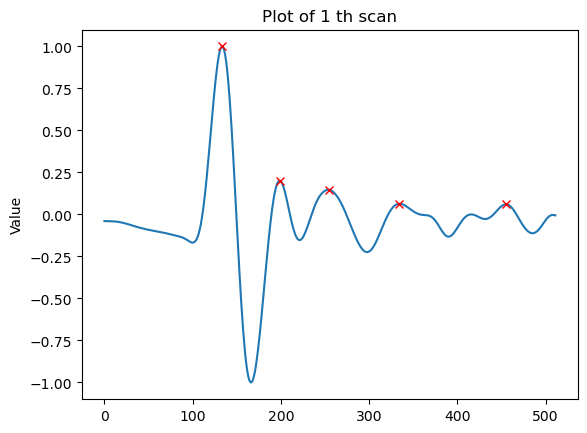

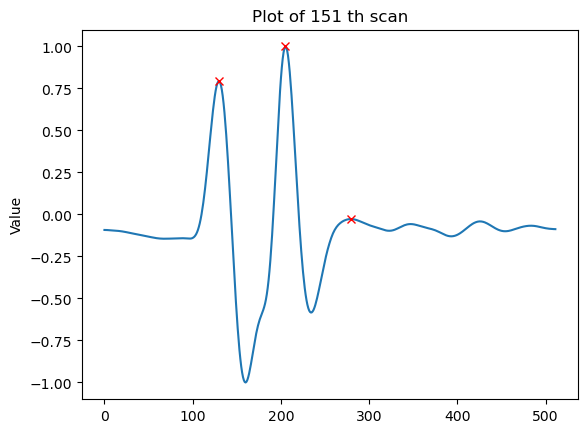

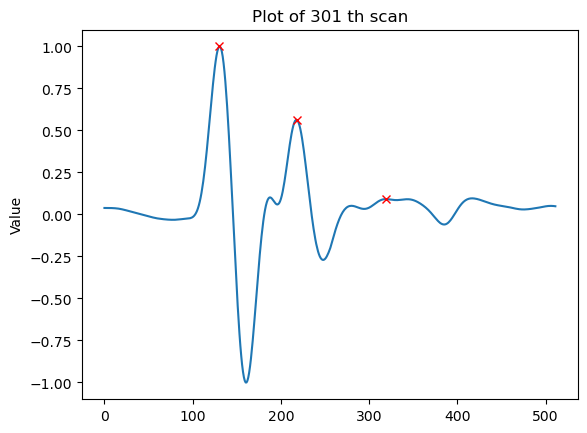

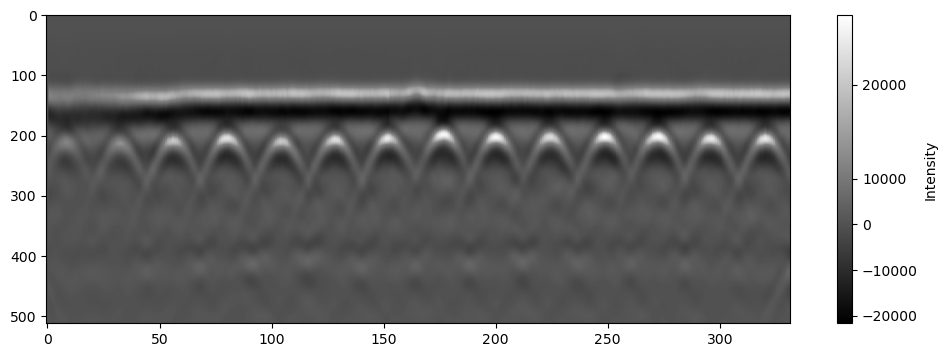

In [5]:
# Plot A-scans and B-scan of the raw data 
gpr_lr.plot.Plot_a_scan(df_1)
gpr_lr.plot.Plot_b_scan_advanced(df_1, 0.7)

In [6]:
# Apply scan-by-scan time-zero correction
time0df, rh_nsamp = gpr_lr.Timezero_individual(df_1, rhf_position, rhf_range)

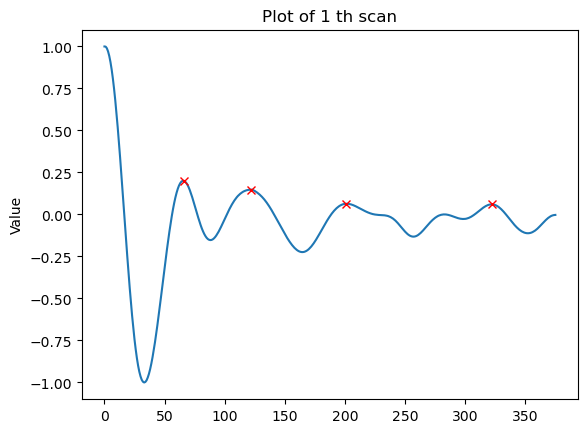

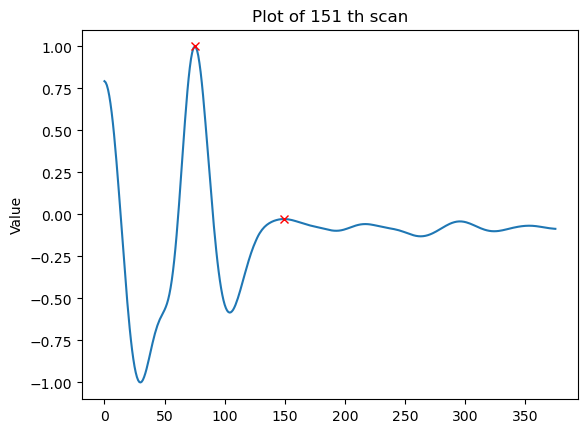

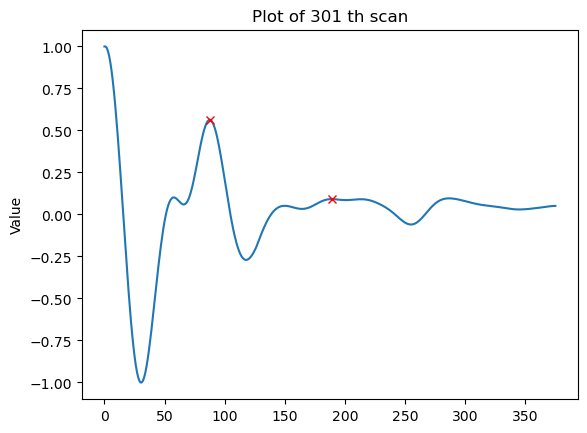

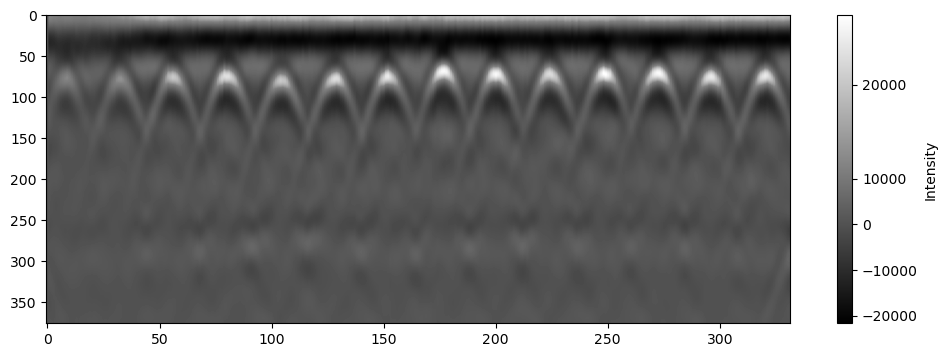

In [7]:
# Plot A-scans and B-scan of the time-zeroed data
gpr_lr.plot.Plot_a_scan(time0df)
gpr_lr.plot.Plot_b_scan_advanced(time0df, 0.7)

In [8]:
# Migration
migrated_df, profilePos, dt, dx, velocity = gpr_lr.FK_migration(time0df, rhf_spm, rhf_sps, rhf_position, rhf_range, rh_nsamp, rhf_espr=11)

512it [00:00, 15476.58it/s]


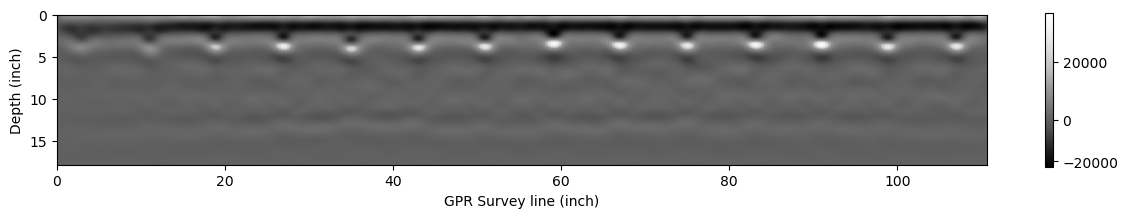

In [9]:
# Plot migrated data
gpr_lr.plot.Plot_migrated_advanced(migrated_df, profilePos, rhf_depth, rh_nsamp, 0.7)

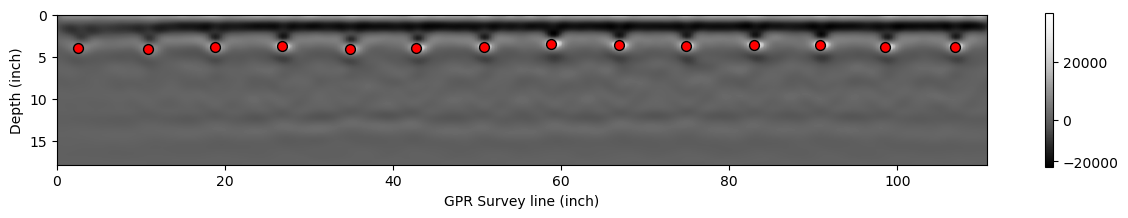

In [10]:
# Locate rebar configuration based on the migration result
gpr_lr.Locate_rebar(migrated_df, rhf_depth, rh_nsamp, profilePos = profilePos, amplitude_threshold = 0.70, depth_threshold=0.10, num_clusters=14, midpoint_factor=0.7)